# HW 2: Agent-Based Modeling of Pandemic Spread (Part 0)

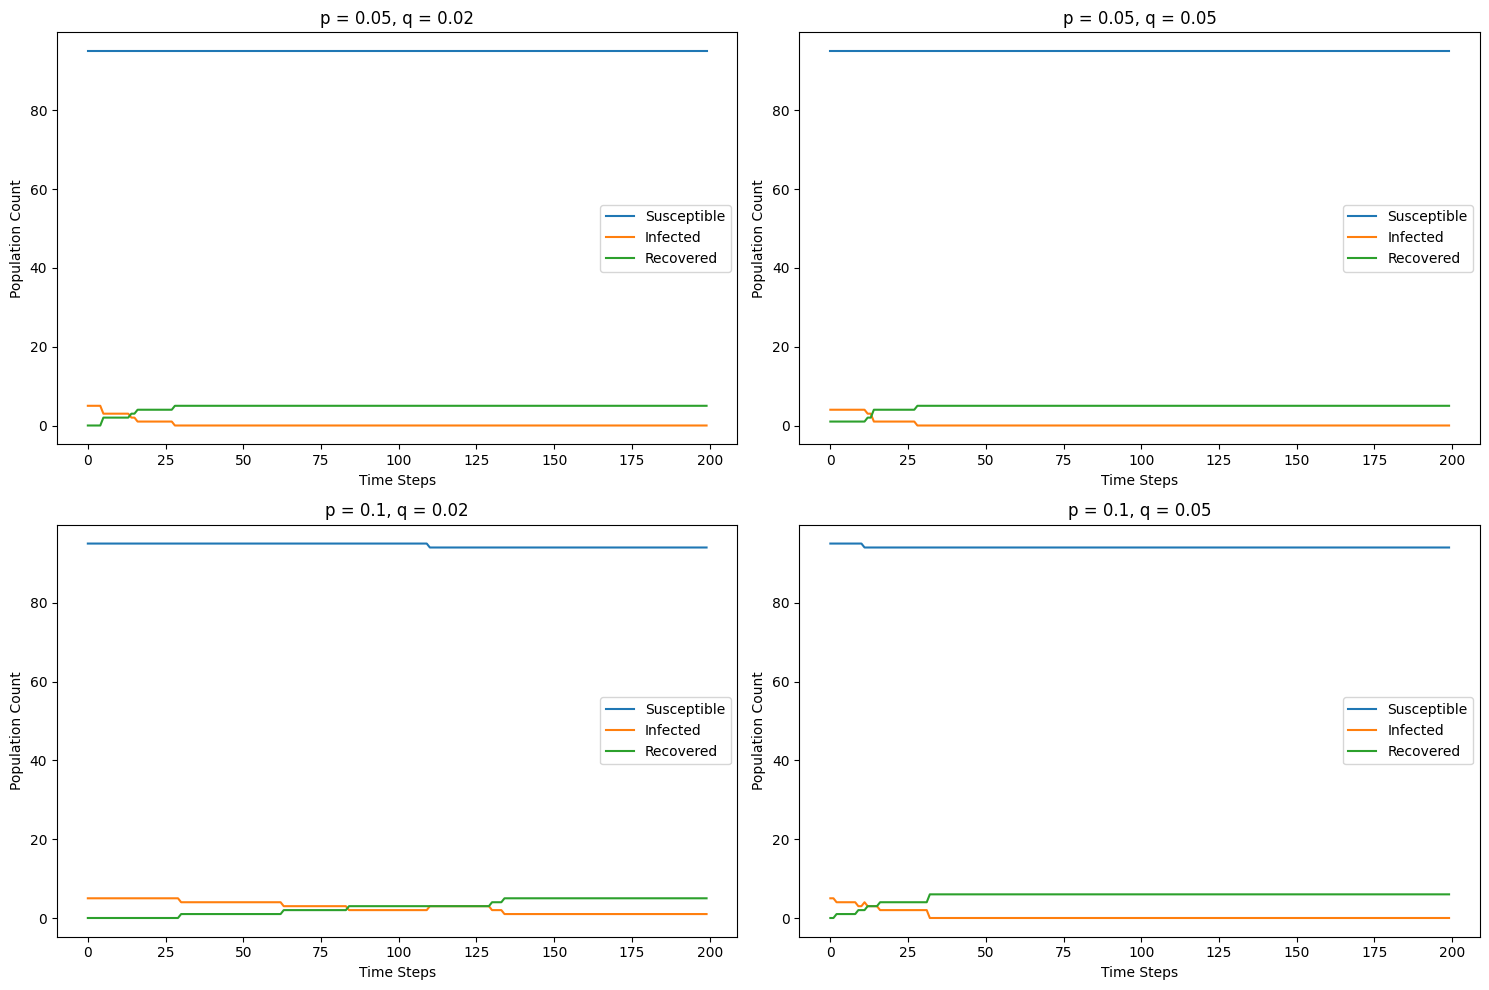

In [1]:
# A) Building the Base Model: Infection Dynamics in a Population
import numpy as np
import matplotlib.pyplot as plt

# parameters
grid_size = 75
num_agents = 100
initial_infected = 5
initial_susceptible = num_agents - initial_infected
time_steps = 200
infection_probability_p = [0.05, 0.1]
recovery_probability_q = [0.02, 0.05]

# Agent states
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2

def initialize_agents():
    grid = np.zeros((grid_size, grid_size), dtype=int)
    agents = []

    for _ in range(initial_susceptible):
        x, y = np.random.randint(0, grid_size, size=2)
        agents.append([x, y, SUSCEPTIBLE])
        grid[x, y] = SUSCEPTIBLE

    for _ in range(initial_infected):
        x, y = np.random.randint(0, grid_size, size=2)
        agents.append([x, y, INFECTED])
        grid[x, y] = INFECTED

    return grid, agents

def move_agent(agent):
    x, y, state = agent
    direction = np.random.choice(["up", "down", "left", "right", "stay"])
    if direction == "up" and x > 0:
        x -= 1
    elif direction == "down" and x < grid_size - 1:
        x += 1
    elif direction == "left" and y > 0:
        y -= 1
    elif direction == "right" and y < grid_size - 1:
        y += 1
    return [x, y, state]

def update_agents(grid, agents, p, q):
    new_agents = []
    for agent in agents:
        x, y, state = agent

        if state == SUSCEPTIBLE:
            if any(neighbor[2] == INFECTED for neighbor in agents if neighbor[:2] == [x, y]):
                if np.random.random() < p:
                    state = INFECTED

        elif state == INFECTED:
            if np.random.random() < q:
                state = RECOVERED

        new_agent = move_agent([x, y, state])
        grid[new_agent[0], new_agent[1]] = new_agent[2]
        new_agents.append(new_agent)

    return grid, new_agents

def run_simulation(p, q):
    grid, agents = initialize_agents()
    susceptible_counts, infected_counts, recovered_counts = [], [], []

    for _ in range(time_steps):
        grid, agents = update_agents(grid, agents, p, q)

        state_counts = np.bincount([agent[2] for agent in agents], minlength=3)
        susceptible_counts.append(state_counts[SUSCEPTIBLE])
        infected_counts.append(state_counts[INFECTED])
        recovered_counts.append(state_counts[RECOVERED])

    return susceptible_counts, infected_counts, recovered_counts

fig, axs = plt.subplots(len(infection_probability_p), len(recovery_probability_q), figsize=(15, 10))
for i, p in enumerate(infection_probability_p):
    for j, q in enumerate(recovery_probability_q):
        susceptible_counts, infected_counts, recovered_counts = run_simulation(p, q)

        axs[i, j].plot(susceptible_counts, label="Susceptible")
        axs[i, j].plot(infected_counts, label="Infected")
        axs[i, j].plot(recovered_counts, label="Recovered")
        axs[i, j].set_title(f"p = {p}, q = {q}")
        axs[i, j].set_xlabel("Time Steps")
        axs[i, j].set_ylabel("Population Count")
        axs[i, j].legend()

plt.tight_layout()
plt.show()


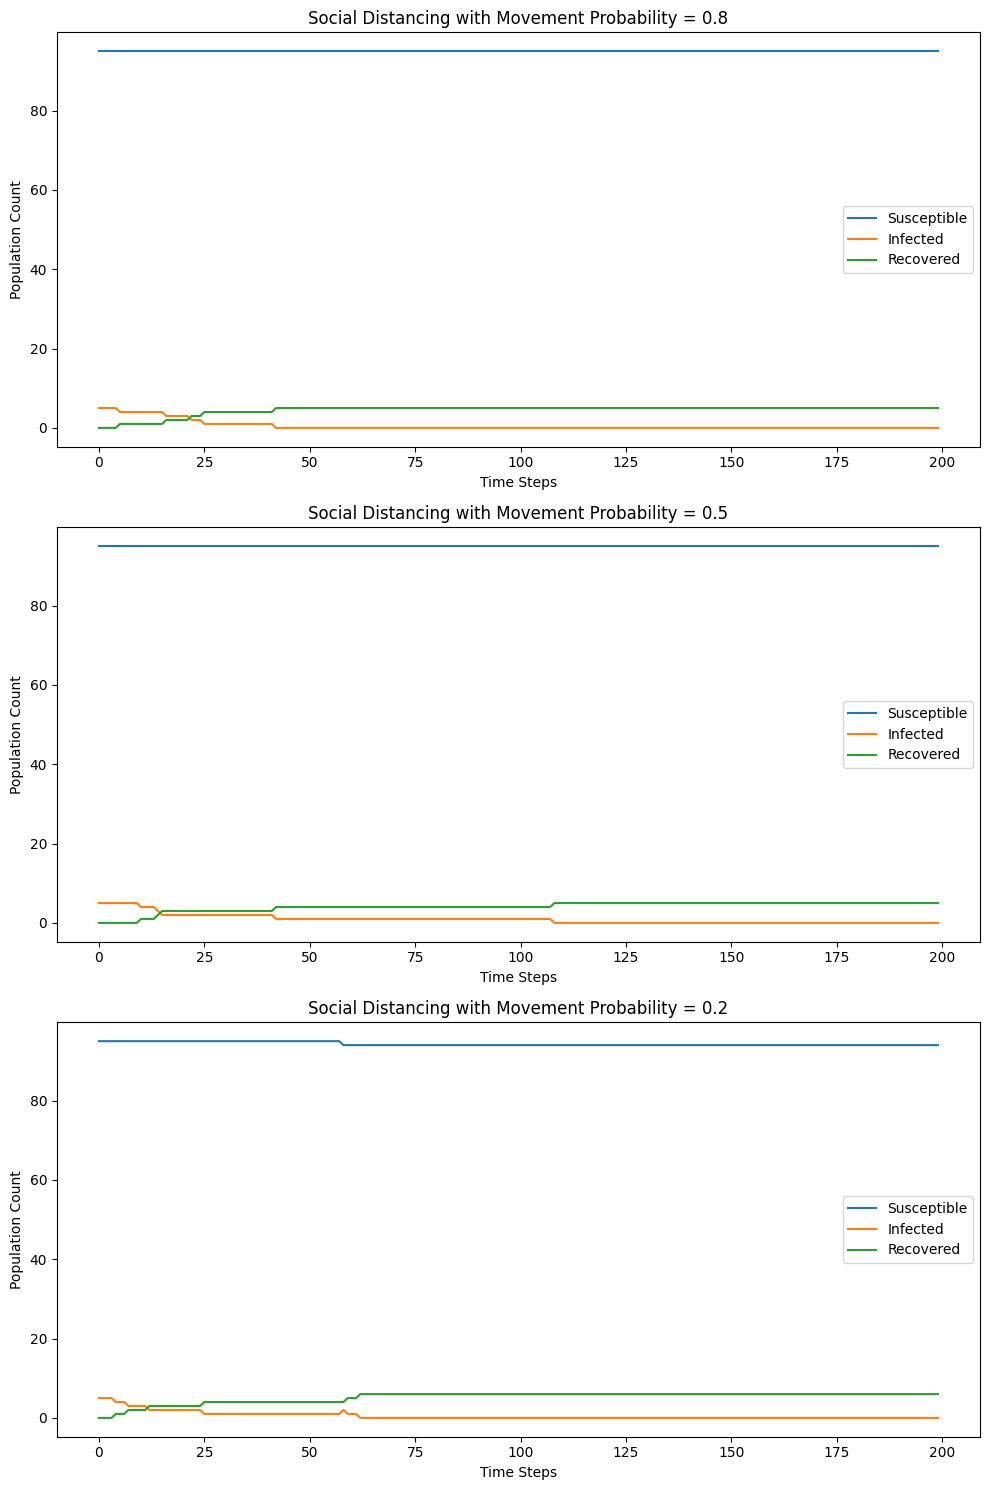

In [2]:
# B) Extending the Model: Social Distancing and Intervention Strategies
movement_probabilities = [0.8, 0.5, 0.2]

def move_agent_with_social_distancing(agent, movement_prob):
    x, y, state = agent
    if np.random.random() < movement_prob:
        direction = np.random.choice(["up", "down", "left", "right", "stay"])
        if direction == "up" and x > 0:
            x -= 1
        elif direction == "down" and x < grid_size - 1:
            x += 1
        elif direction == "left" and y > 0:
            y -= 1
        elif direction == "right" and y < grid_size - 1:
            y += 1
    return [x, y, state]

def update_agents_with_social_distancing(grid, agents, p, q, movement_prob):
    new_agents = []
    for agent in agents:
        x, y, state = agent

        if state == SUSCEPTIBLE:
            if any(neighbor[2] == INFECTED for neighbor in agents if neighbor[:2] == [x, y]):
                if np.random.random() < p:
                    state = INFECTED

        elif state == INFECTED:
            if np.random.random() < q:
                state = RECOVERED

        new_agent = move_agent_with_social_distancing([x, y, state], movement_prob)
        grid[new_agent[0], new_agent[1]] = new_agent[2]
        new_agents.append(new_agent)

    return grid, new_agents

# with social distancing
def run_simulation_with_social_distancing(p, q, movement_prob):
    grid, agents = initialize_agents()
    susceptible_counts, infected_counts, recovered_counts = [], [], []

    for _ in range(time_steps):
        grid, agents = update_agents_with_social_distancing(grid, agents, p, q, movement_prob)

        state_counts = np.bincount([agent[2] for agent in agents], minlength=3)
        susceptible_counts.append(state_counts[SUSCEPTIBLE])
        infected_counts.append(state_counts[INFECTED])
        recovered_counts.append(state_counts[RECOVERED])

    return susceptible_counts, infected_counts, recovered_counts

# different social distancing levels
fig, axs = plt.subplots(len(movement_probabilities), 1, figsize=(10, 15))
for i, movement_prob in enumerate(movement_probabilities):
    susceptible_counts, infected_counts, recovered_counts = run_simulation_with_social_distancing(
        p=0.1, q=0.05, movement_prob=movement_prob)

    axs[i].plot(susceptible_counts, label="Susceptible")
    axs[i].plot(infected_counts, label="Infected")
    axs[i].plot(recovered_counts, label="Recovered")
    axs[i].set_title(f"Social Distancing with Movement Probability = {movement_prob}")
    axs[i].set_xlabel("Time Steps")
    axs[i].set_ylabel("Population Count")
    axs[i].legend()

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# without social distancing
baseline_susceptible, baseline_infected, baseline_recovered = run_simulation_with_social_distancing(
    p=0.1, q=0.05, movement_prob=1.0
)

def analyze_simulation(susceptible_counts, infected_counts, recovered_counts):
    peak_infected = max(infected_counts)
    time_to_peak = infected_counts.index(peak_infected)
    final_recovered = recovered_counts[-1]
    stable_recovery_time = len(recovered_counts) - 1

    for t in range(1, len(recovered_counts)):
        if abs(recovered_counts[t] - recovered_counts[t - 1]) < 0.5:
            stable_recovery_time = t
            break

    return {
        "Peak Infected": peak_infected,
        "Time to Peak": time_to_peak,
        "Final Recovered": final_recovered,
        "Time to Stability": stable_recovery_time
    }

baseline_metrics = analyze_simulation(baseline_susceptible, baseline_infected, baseline_recovered)

social_distancing_metrics = []
for movement_prob in movement_probabilities:
    sus_counts, inf_counts, rec_counts = run_simulation_with_social_distancing(
        p=0.1, q=0.05, movement_prob=movement_prob
    )
    metrics = analyze_simulation(sus_counts, inf_counts, rec_counts)
    metrics["Movement Probability"] = movement_prob
    social_distancing_metrics.append(metrics)


In [6]:
# display results
data = {
    "Movement Probability": [1.0] + movement_probabilities,
    "Peak Infected": [baseline_metrics["Peak Infected"]] + [metrics["Peak Infected"] for metrics in social_distancing_metrics],
    "Time to Peak": [baseline_metrics["Time to Peak"]] + [metrics["Time to Peak"] for metrics in social_distancing_metrics],
    "Final Recovered": [baseline_metrics["Final Recovered"]] + [metrics["Final Recovered"] for metrics in social_distancing_metrics],
    "Time to Stability": [baseline_metrics["Time to Stability"]] + [metrics["Time to Stability"] for metrics in social_distancing_metrics],
}

alternative_comparison_df = pd.DataFrame(data)
alternative_comparison_df


,Movement Probability,Peak Infected,Time to Peak,Final Recovered,Time to Stability
0,1.0,5,0,5,2
1,0.8,5,0,5,4
2,0.5,5,0,5,1
3,0.2,5,0,5,1
